# 二项分布

## 抛一个正反面概率均为 50% 的硬币三次，结果是两个正面的概率是多少？

**我们先采用最简单的方法 —— 数数**

一共有 8 种可能：
```
0 0 0
0 0 1
0 1 0
1 0 0
0 1 1
1 1 0
1 0 1
1 1 1
```

其中有三种结果，存在「两个正面」。所以，概率为 3 * 1/8 = 3/8

所有的情况概率分别为：

```
P(三个正面) = P(HHH) = 1/8
P(两个正面) = P(HHT) + P(HTH) + P(THH) = 1/8 + 1/8 + 1/8 = 3/8
P(一个正面) = P(HTT) + P(THT) + P(TTH) = 1/8 + 1/8 + 1/8 = 3/8
P(没有正面) = P(TTT) = 1/8
```

设，随机变量 X = "抛 3次硬币里结果是正面的次数"。则：

```
P(X = 3) = 1/8
P(X = 2) = 3/8
P(X = 1) = 3/8
P(X = 0) = 1/8
```

**【Python 实践】用 Python 验证分布**

**概率分布：[(0, 129), (1, 372), (2, 365), (3, 134)]**

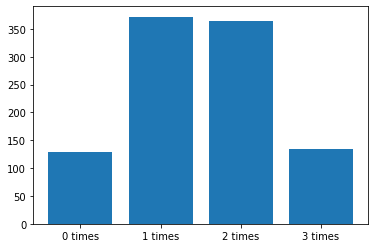

In [60]:
# -*- coding: utf-8 -*-
from collections import Counter
import random
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

total_result = []
for time in range(1000):
    result = 0
    for coin in range(3):
        coin = random.randint(0, 1) # 0为正，1为反
        result += coin
    total_result.append(result)

stat = Counter(total_result)
sort_stat = sorted(stat.items(), key=lambda x:x[0], reverse=False)
display(Markdown("**概率分布：" + str(sort_stat) + "**"))
x, y = zip(*sort_stat)

labels = ['0 times', '1 times', '2 times', '3 times']
plt.bar(range(len(y)), y, tick_label=labels)
plt.show()

**根据柱状图可以看出，概率是对称分布的。**

## 往前一步，抛 9 次硬币里得到 5 个正面的概率是多少？

数数太麻烦了。我们可以使用**「二项式系数」** 公式来计算概率分布：

$$\begin{pmatrix}n \\\\k\end{pmatrix} = \frac{n!}{k!(n-k)!}$$

* 相关链接：https://en.wikipedia.org/wiki/Binomial_coefficient

这个公式和帕斯卡三角（杨辉三角）等价，n+1 为「行数」，k+1 为「列数」。

![triangle](pics/pascal_triangle_animated.gif)

例如，在抛 3 次硬币 中有 2 次正面朝上的概率，是第 4 行第 3 列的值 3。

- 相关链接：https://en.wikipedia.org/wiki/Pascal%27s_triangle

**【Python 实践】用 Python 实现杨辉三角**

In [77]:
def triangel(n):
    l=[1]
    while True:
        yield l
        l=[l[x]+l[x+1] for x in range(len(l)-1)]
        l.insert(0,1)
        l.append(1)
        if len(l)>10:
            break

#生成一个 generator 对象，然后通过for循环迭代输出每一行

a=triangel(10)
for i in a:
    print(i)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
